### the function to extract voltage, current and power readings from log file

In [76]:
from datetime import datetime
from datetime import timedelta
import numpy as np
smooth_N = 100 # add smoothing
def read_file(file_path):
    trace = []
    with open(file_path, 'r') as f:
        # extract start time from start time
        first_line = f.readline()
        data = first_line.strip().split(',')
        start_time = datetime.strptime(data[0], '%H:%M:%S.%f')
        negFlag = False # use a flag to avoid loops
        breakFlag = False
        while True:
            buf = []
            for i in range(0, smooth_N):
                line = f.readline()
                data = line.strip().split(',')
                cur_time = datetime.strptime(data[0], '%H:%M:%S.%f')
                elapsed_time_h = (cur_time - start_time).total_seconds() / 3600 # elapsed time in hours
                if elapsed_time_h < 0:
                    # add another day to avoid negative elapsed time
                    negFlag = True
                    elapsed_time_h += 24
                elif negFlag == True and elapsed_time_h > 0:
                    # finish processing all the data, end the loop
                    breakFlag = True
                    break

                # process voltage, current and power data
                volt = float(data[1]) # V
                curr = float(data[2]) # mA
                pwr = float(data[3]) # mW
                buf.append([elapsed_time_h, volt, curr, pwr])
            
            # use the average
            if len(buf) != 0: # buf is not empty
                buf = np.array(buf)
                trace.append(np.mean(buf, axis=0))
            
            if breakFlag:
                break
    return np.array(trace)

### get the readings using only battery

In [77]:
bat_bat = read_file('./data/bat_bat.txt')
dev_bat = read_file('./data/dev_bat.txt')

### get the readings using battery and solar panel

In [78]:
bat_solar = read_file('./data/bat_solar.txt')
dev_solar = read_file('./data/dev_solar.txt')
solar_solar = read_file('./data/solar_solar.txt')

### plot the voltage of battery, device and solar panel

(87, 4)
(87, 4)
(87, 4)


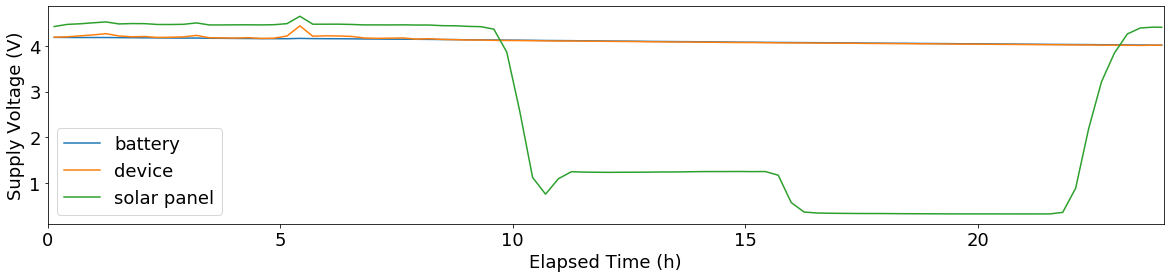

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
print(bat_solar.shape)
print(dev_solar.shape)
print(solar_solar.shape)
plt.plot(bat_solar[:, 0], bat_solar[:, 1], label='battery')
plt.plot(dev_solar[:, 0], dev_solar[:, 1], label='device')
plt.plot(solar_solar[:, 0], solar_solar[:, 1], label='solar panel')
plt.xlim((0, 24))
plt.xlabel('Elapsed Time (h)', fontsize=18)
plt.ylabel('Supply Voltage (V)', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)
plt.savefig('./vo')

### plot the current of battery, device and solar panel

In [ ]:
plt.figure(figsize=(20, 4))
print(bat_solar.shape)
print(dev_solar.shape)
print(solar_solar.shape)
plt.plot(bat_solar[:, 0], bat_solar[:, 1], label='battery')
plt.plot(dev_solar[:, 0], dev_solar[:, 1], label='device')
plt.plot(solar_solar[:, 0], solar_solar[:, 1], label='solar panel')
plt.xlim((0, 24))
plt.xlabel('Elapsed Time (h)', fontsize=18)
plt.ylabel('Supply Voltage (V)', fontsize=18)
plt.tick_params(labelsize=18)
plt.legend(fontsize=18)